# Lab 8 & 9 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

## 1. Get the data from Kaggle
- fMNIST data: [link](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

In [135]:
import pandas as pd

# plotting modules
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.offline as po
import seaborn as sns

import numpy as np

po.offline.init_notebook_mode()

In [136]:
fmnist_df_train = pd.read_csv("data/fashion_mnist/fashion-mnist_train.csv")
fmnist_df_test = pd.read_csv("data/fashion_mnist/fashion-mnist_test.csv")

y_train = fmnist_df_train["label"].to_numpy()
X_train = fmnist_df_train.drop("label", axis=1).to_numpy()

y_test = fmnist_df_test["label"].to_numpy()
X_test = fmnist_df_test.drop("label", axis=1).to_numpy()

## 2. Run Great EDA

### Data Exploration

In [137]:
print(f'Image DType: {type(X_train)}')
print(f'Image Element DType: {type(X_train[0,0])}')
print(f'Label Element DType: {type(y_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {X_train.shape}')
print(f'Labels: {y_train.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {X_test.shape}')
print(f'Labels: {y_test.shape}')
print('Image Data Range:')
print(f'Min: {X_train.min()}')
print(f'Max: {X_train.max()}')
print('Class Label Range:')
print(f'Min: {y_train.min()}')
print(f'Max: {y_train.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.int64'>
Label Element DType: <class 'numpy.int64'>
**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255
Class Label Range:
Min: 0
Max: 9


- The fMNIST dataset consists of 70,000 data (60,000 for train and 10,000 for test), each with 784 features (28 x 28).
- Each data point represents the pixel values of a 28 x 28 image.
- The range of each pixel value is from 0 to 255.
- The target class of the data is ranging from 0 to 9.

### Check the actual values of data 

In [138]:
print(X_train[0])
print(y_train[:10])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0
   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  88 201 228 225 255 115  62
 137 255 235 222 255 135   0   0   0   0   0   0   0   0   0   0   0   0
   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254  45
   0   0   0   0   0   0   0   0   1   0   0 214 222 210 213 224 225 217
 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0   1   0
   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219 213 226
 211 237 150   0   0   0   0   0   0   2   0   0 237 222 215 207 210 212
 213 206 214 213 214 213 210 215 214 206 199 218 25

### Plot the data as images

In [139]:
def plot_image(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

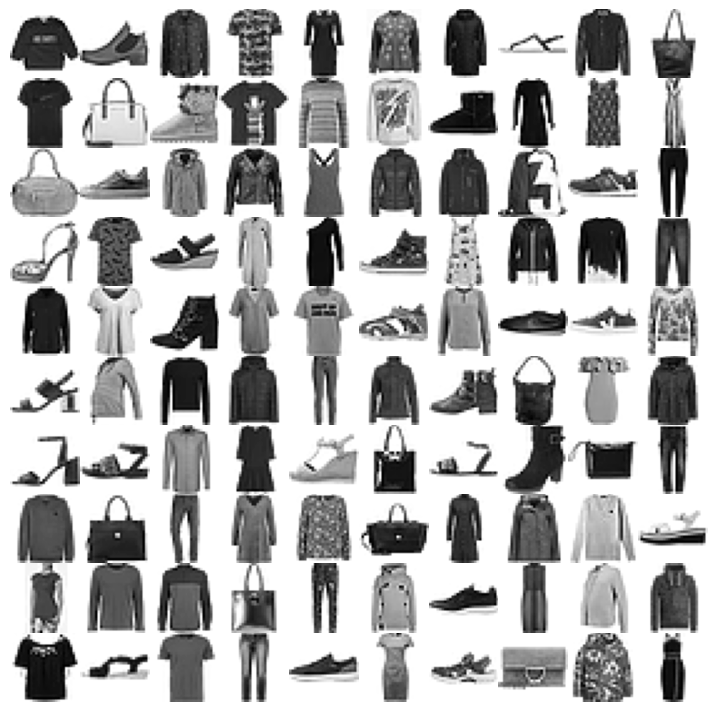

In [140]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_image(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [141]:
y_train[:100]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8, 0, 8, 9, 0, 2, 2, 9, 3, 3, 3, 8, 7,
       4, 4, 0, 4, 4, 8, 7, 1, 5, 0, 5, 3, 2, 7, 3, 4, 2, 1, 6, 0, 9, 6,
       0, 5, 6, 7, 7, 2, 5, 2, 2, 4, 1, 4, 9, 8, 3, 4, 5, 5, 6, 3, 5, 8,
       5, 9, 8, 1, 2, 8, 1, 3, 6, 8, 3, 4, 2, 5, 0, 2, 6, 8, 1, 2, 7, 6,
       6, 4, 6, 5, 0, 1, 7, 3, 5, 8, 4, 3], dtype=int64)

- The initial 100 items from the training dataset were visualized.
- Upon observation, it is evident that the data comprises items related to fashion, such as shoes, clothing, and bags.
- Class labels are assigned to these categories numerically, ranging from 0 to 9.

### Color Map

To verify the images, they were displayed at different scales.

Text(0.5, 1.0, 'Binary Scale')

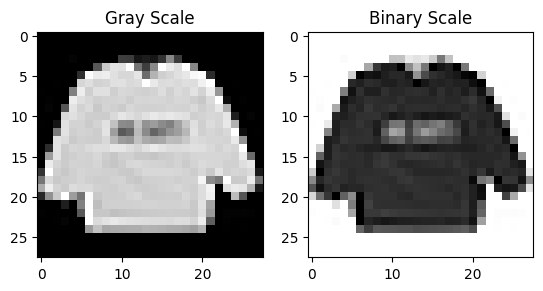

In [142]:
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Gray Scale')
plt.subplot(1, 2, 2)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.title('Binary Scale')

To inspect the color based on each pixel value, the data are visualized.
- In a grayscale image, it is observed that the closer a pixel value is to 255, the brighter it is, and the closer it is to 0, the darker it becomes.

In [143]:
def visualize_input(i, ax, y):
    img = X_train[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class no : {y[i]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

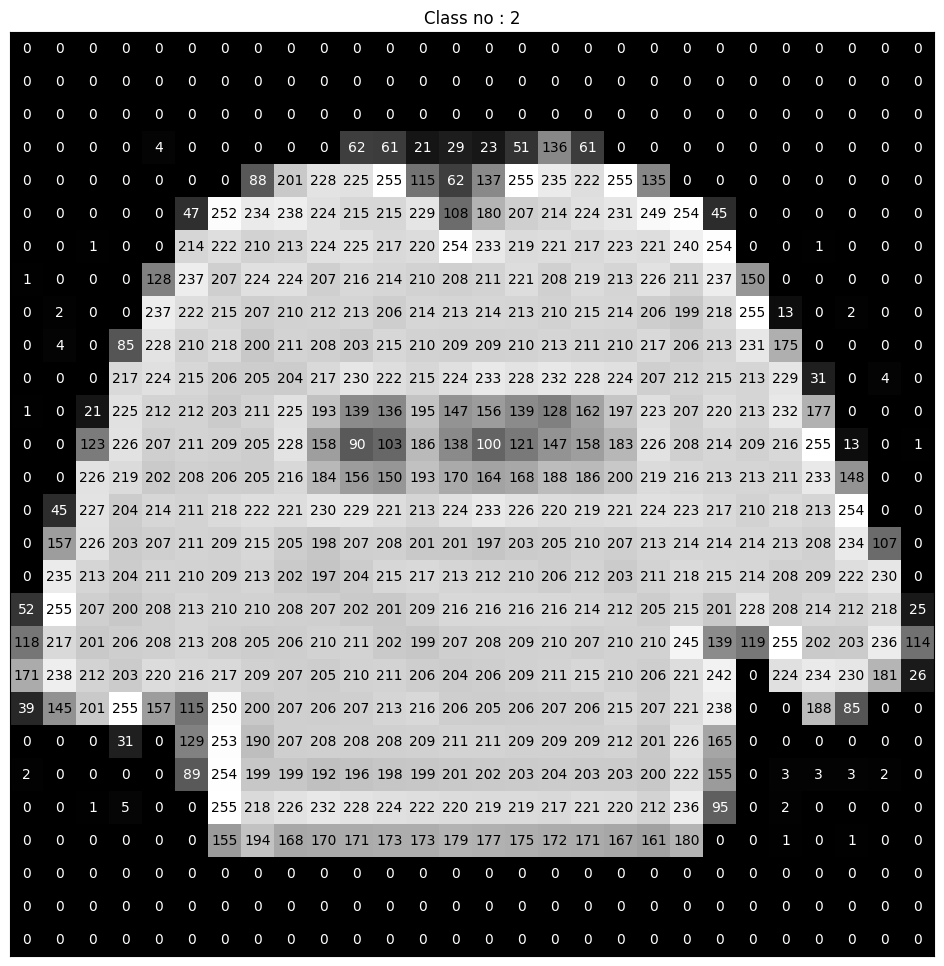

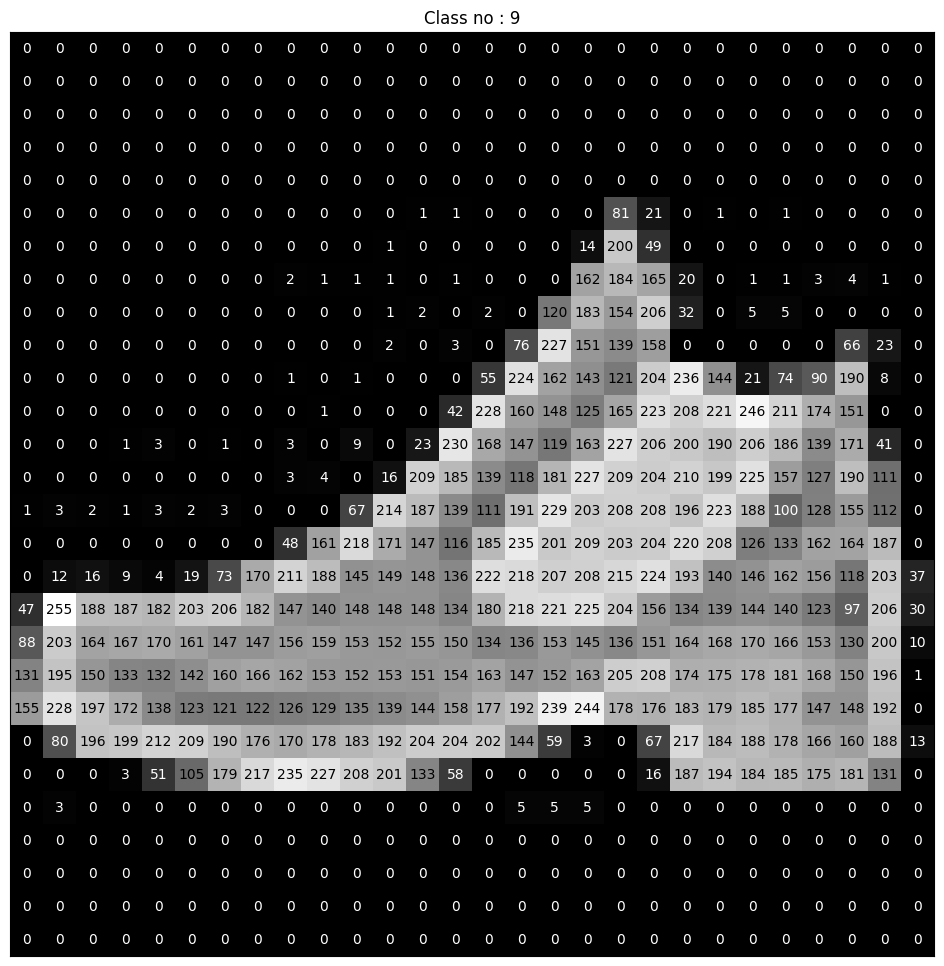

In [144]:
for i in range(2):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, y_train)

### Pixel Distribution

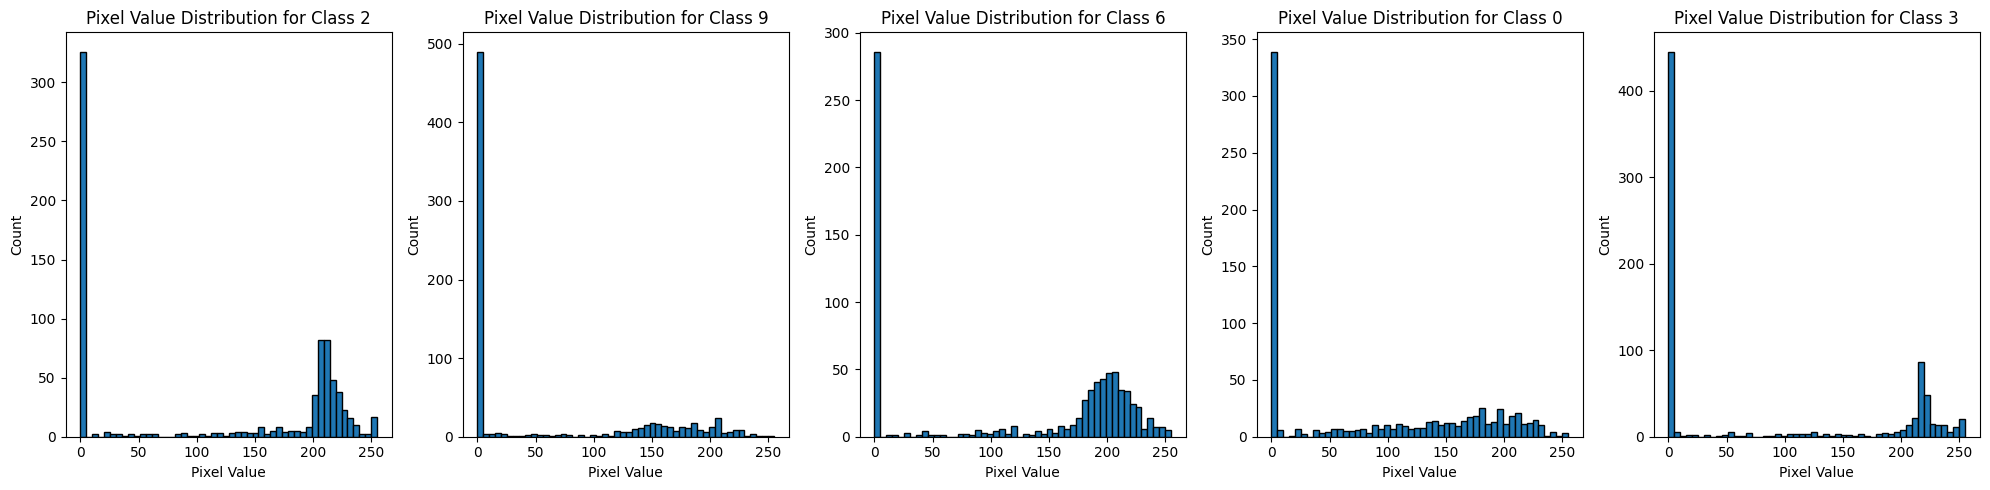

In [145]:
# Plot the distribution of pixel values
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    plt.sca(axes[i])
    plt.hist(X_train[i], bins=50, edgecolor='black')
    plt.title(f'Pixel Value Distribution for Class {y_train[i]}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- The pixel value distribution of images across five classes was plotted.
- It was observed that for all class images, the value of pixel 0 is the most frequent, followed by values around 200.
- The majority of the pixels are indicative of the background.

### The Average Image per Class

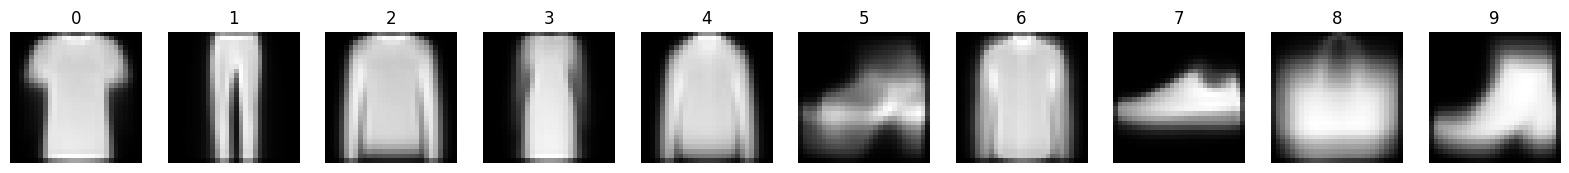

In [146]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_train.astype('int8') == digit)[0]
    avg_image = np.mean(X_train[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

- The average pixel values for each data point across classes 0 to 9 were calculated and visualized.
- Classes 2, 4, 6, and 5, 7 are not easily distinguishable in the above images.
- According to the Kaggle dataset, each image represents the following:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
- Reference: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

### Class Imbalance check


<Axes: xlabel='class', ylabel='count'>

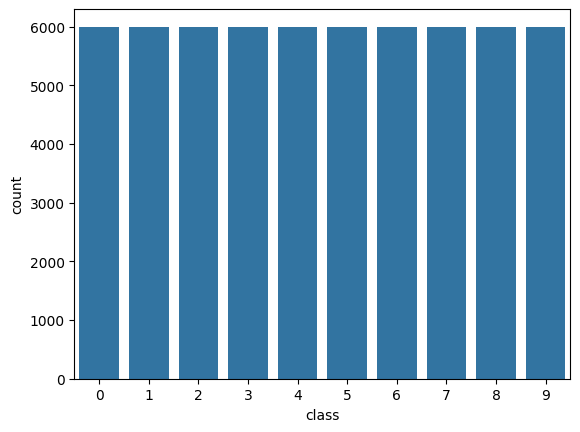

In [147]:
y_values, counts = np.unique(y_train, return_counts=True)
df_y = pd.DataFrame({'class': y_values, 'count': counts})
sns.barplot(df_y, x="class", y="count")

In [148]:
# Count the occurrences of each class
class_counts = np.bincount(y_train)

# Plot a piechart using plotly
fig = px.pie(values=class_counts, names=[str(i) for i in range(10)], title='Percentage of samples per label')
fig.show()

- The bar plot and pie chart above show how data is distributed across each class.
- In the test set, data for each label is evenly distributed, with 6,000 instances for each class from 0 to 9.

## 3. Define and Train a fully-connected feedforward neural network of your choice using Keras and Tensorflow

In [149]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

### Data Preprocessing

Pixel values range up to 255, but to facilitate efficient training, the data is normalized by dividing by 255.

In [150]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print(X_train.min())
print(X_train.max())
print(X_train.shape)
print(X_train[0].shape)

0.0
1.0
(60000, 784)
(784,)


### Split Dataset

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

### Define the 3 different models

#### Model 1: Basic model

In [152]:
model_1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

#### Model 2: Basic model with the modified batch size (32)

In [153]:
model_2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

#### Model 3: Basic model with an additional hidden layer

In [154]:
model_3 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### Define the Loss Function, Optimizer, Metrics

In [155]:
model_1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model_2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model_3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Define the model checkpoint callback

In [156]:
model_checkpoint_callback_1 = ModelCheckpoint(
    filepath='data/best_model_1.hdf5',
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

model_checkpoint_callback_2 = ModelCheckpoint(
    filepath='data/best_model_2.hdf5',
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

model_checkpoint_callback_3 = ModelCheckpoint(
    filepath='data/best_model_3.hdf5',
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Train the model

In [157]:
history_1 = model_1.fit(X_train, 
                        y_train, 
                        epochs=30, 
                        batch_size=128,
                        validation_data=(X_val, y_val),
                        callbacks=[model_checkpoint_callback_1])

Epoch 1/30


375/375 [==============================] - 2s 6ms/step - loss: 0.5917 - accuracy: 0.7916 - val_loss: 0.4267 - val_accuracy: 0.8486
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.4103 - accuracy: 0.8498 - val_loss: 0.3892 - val_accuracy: 0.8543
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3588 - accuracy: 0.8693 - val_loss: 0.3544 - val_accuracy: 0.8699
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3277 - accuracy: 0.8806 - val_loss: 0.3496 - val_accuracy: 0.8698
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3091 - accuracy: 0.8864 - val_loss: 0.3255 - val_accuracy: 0.8800
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2906 - accuracy: 0.8931 - val_loss: 0.3473 - val_accuracy: 0.8740
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2765 - accuracy: 0.8975 - val_loss: 0.3329 - val_accuracy: 0.8702
Epoch 8/30
375/37

In [158]:
history_2 = model_2.fit(X_train, 
                        y_train, 
                        epochs=30, 
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[model_checkpoint_callback_2])

Epoch 1/30


1500/1500 [==============================] - 6s 4ms/step - loss: 0.5175 - accuracy: 0.8136 - val_loss: 0.4172 - val_accuracy: 0.8505
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3860 - accuracy: 0.8613 - val_loss: 0.3952 - val_accuracy: 0.8570
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3507 - accuracy: 0.8751 - val_loss: 0.3599 - val_accuracy: 0.8712
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3308 - accuracy: 0.8827 - val_loss: 0.3581 - val_accuracy: 0.8788
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3179 - accuracy: 0.8893 - val_loss: 0.3856 - val_accuracy: 0.8692
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3021 - accuracy: 0.8939 - val_loss: 0.3761 - val_accuracy: 0.8702
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2954 - accuracy: 0.8978 - val_loss: 0.3806 - val_accuracy: 0.8783
Epo

In [159]:
history_3 = model_3.fit(X_train, 
                        y_train, 
                        epochs=30, 
                        batch_size=128,
                        validation_data=(X_val, y_val),
                        callbacks=[model_checkpoint_callback_3])

Epoch 1/30


375/375 [==============================] - 3s 7ms/step - loss: 0.5783 - accuracy: 0.7926 - val_loss: 0.4709 - val_accuracy: 0.8218
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3982 - accuracy: 0.8540 - val_loss: 0.4217 - val_accuracy: 0.8420
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3518 - accuracy: 0.8685 - val_loss: 0.3746 - val_accuracy: 0.8633
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3245 - accuracy: 0.8785 - val_loss: 0.3487 - val_accuracy: 0.8741
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3013 - accuracy: 0.8885 - val_loss: 0.3351 - val_accuracy: 0.8794
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2830 - accuracy: 0.8937 - val_loss: 0.3485 - val_accuracy: 0.8698
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2702 - accuracy: 0.8993 - val_loss: 0.3238 - val_accuracy: 0.8849
Epoch 8/30
375/37

### Plot the training and validation loss and accuracy for each model

#### Model 1

Text(0.5, 1.0, 'Training and validation loss')

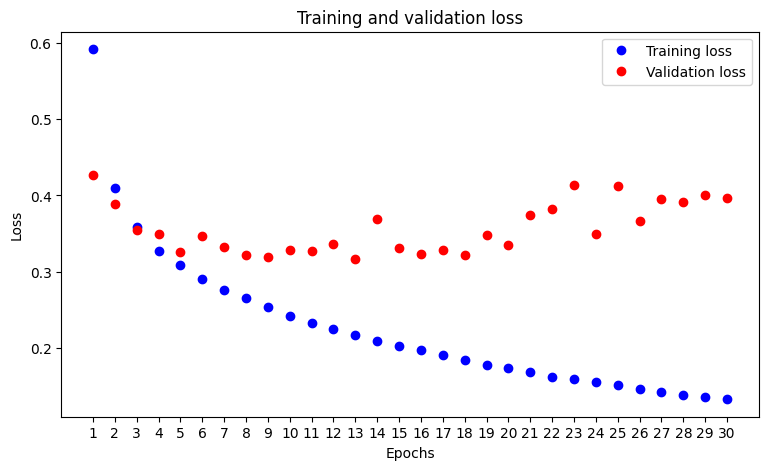

In [160]:
history_dict_1 = history_1.history

# plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict_1["loss"]
val_loss_values = history_dict_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

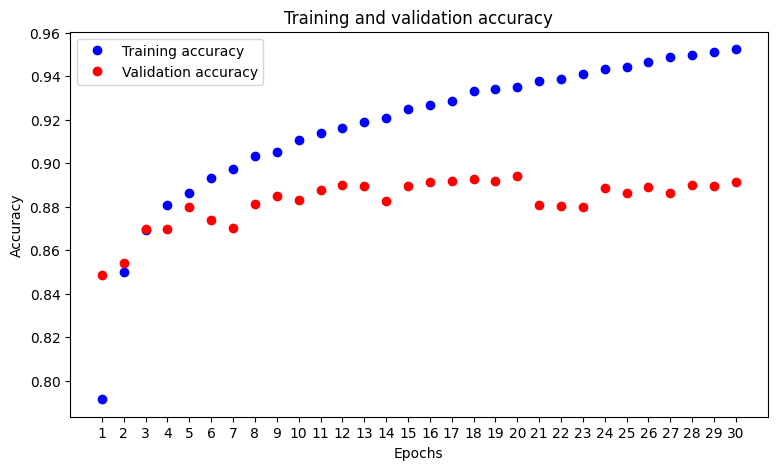

In [161]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict_1["accuracy"]
val_loss_values = history_dict_1["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

#### Model 2

Text(0.5, 1.0, 'Training and validation loss')

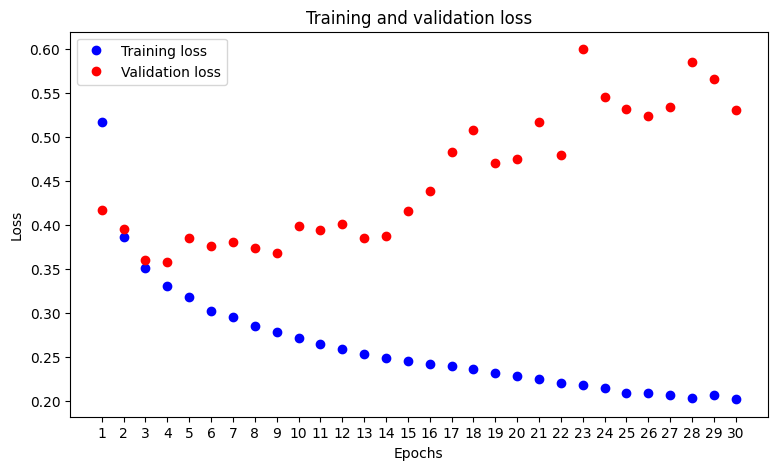

In [162]:
history_dict_2 = history_2.history

# plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict_2["loss"]
val_loss_values = history_dict_2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

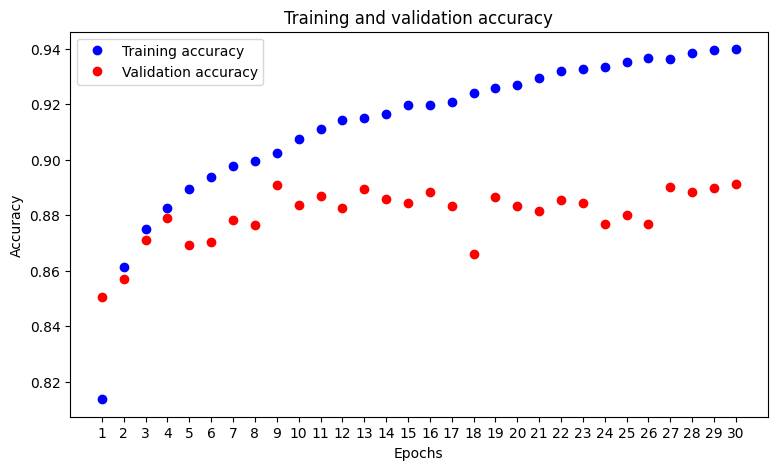

In [163]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict_2["accuracy"]
val_loss_values = history_dict_2["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

 #### Model 3

Text(0.5, 1.0, 'Training and validation loss')

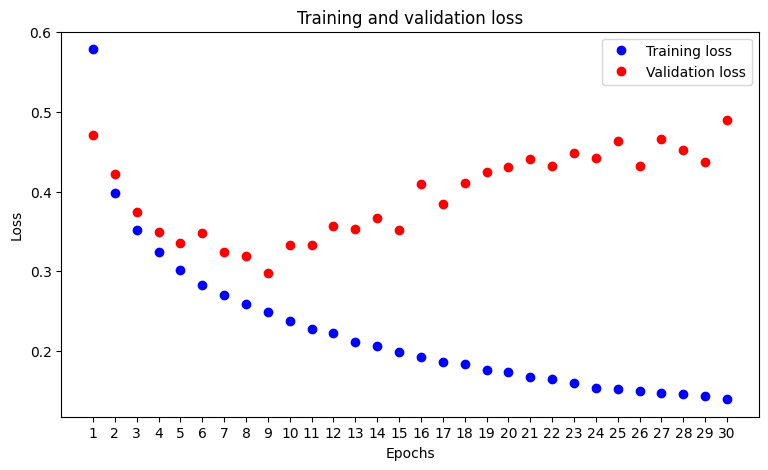

In [164]:
history_dict_3 = history_3.history

# plot the training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

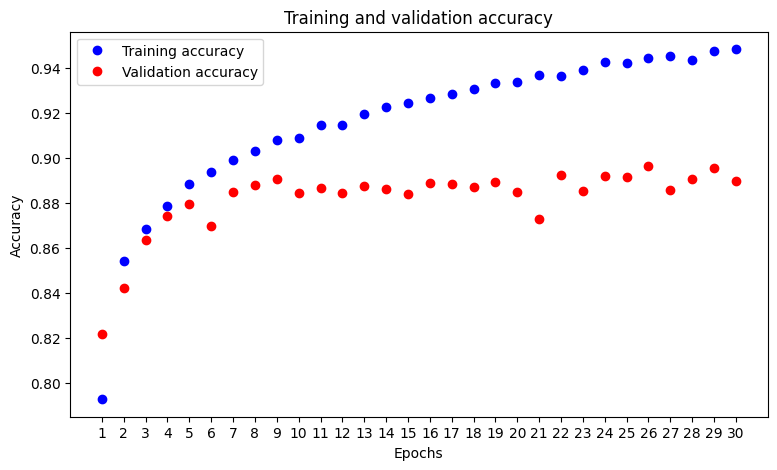

In [165]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
loss_values = history_dict_3["accuracy"]
val_loss_values = history_dict_3["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training accuracy")
plt.plot(epochs, val_loss_values, "ro", label="Validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

### Choose the best set of weights 

In [166]:
df = pd.DataFrame({'epochs': epochs, 'model1_val_loss': history_dict_1["val_loss"], 
                   'model2_val_loss': history_dict_2["val_loss"], 'model3_val_loss': history_dict_3["val_loss"],
                   'model1_val_accuracy': history_dict_1["val_accuracy"], 'model2_val_accuracy': history_dict_2["val_accuracy"], 
                   'model3_val_accuracy': history_dict_3["val_accuracy"]})

df = df.round(3)
df

epochs  model1_val_loss  ...  model2_val_accuracy  model3_val_accuracy
0        1            0.427  ...                0.850                0.822
1        2            0.389  ...                0.857                0.842
2        3            0.354  ...                0.871                0.863
3        4            0.350  ...                0.879                0.874
4        5            0.325  ...                0.869                0.879
5        6            0.347  ...                0.870                0.870
6        7            0.333  ...                0.878                0.885
7        8            0.322  ...                0.876                0.888
8        9            0.320  ...                0.891                0.891
9       10            0.328  ...                0.884                0.884
10      11            0.327  ...                0.887                0.887
11      12            0.336  ...                0.883                0.884
12      13            0.317  ...                0.890                0.888
13      14            0.369  ...                0.886                0.886
14      15            0.331  ...                0.885                0.884
15      16            0.323  ...                0.888                0.889
16      17            0.329  ...                0.883                0.888
17      18            0.322  ...                0.866                0.887
18      19            0.348  ...                0.886                0.889
19      20            0.336  ...                0.883                0.885
20      21            0.374  ...                0.881                0.873
21      22            0.383  ...                0.886                0.893
22      23            0.413  ...                0.884                0.885
23      24            0.349  ...                0.877                0.892
24      25            0.412  ...                0.880                0.892
25      26            0.367  ...                0.877                0.896
26      27            0.396  ...                0.890                0.886
27      28            0.392  ...                0.888                0.891
28      29            0.400  ...                0.890                0.896
29      30            0.396  ...                0.891                0.890

[30 rows x 7 columns]

In [167]:
print(f"[Model 1] Epoch of minimum validation loss: {np.argmin(history_dict_1['val_loss']) + 1}")
print(f"[Model 2] Epoch of minimum validation loss: {np.argmin(history_dict_2['val_loss']) + 1}")
print(f"[Model 3] Epoch of minimum validation loss: {np.argmin(history_dict_3['val_loss']) + 1}")

[Model 1] Epoch of minimum validation loss: 13
[Model 2] Epoch of minimum validation loss: 4
[Model 3] Epoch of minimum validation loss: 9


- When training models, the point of best performance is identified where the loss value on the validation set is at its lowest. Therefore, for Models 1, 2, and 3, the best performing weight set corresponds to epoch=13, 4, 9. 
- Beyond each epoch selected, while the loss values on the training set continue to decrease, the loss values on the validation set begin to increase. This indicates that the models are overfitting to the training set, losing their generalizability in the process.

### Summarize

| Model | num_layers | batch_size | Best Epoch | min_val_loss | val_accuracy |  
|-------|------------|------------|------------|--------------|--------------|
| Model 1 | 2 (512, 10) | 128 | 13 | 0.317 | 0.889 |
| Model 2 | 2 (512, 10) | 32 | 4 | 0.358 | 0.879 |
| Model 3 | 3 (512, 128, 10) | 128 | 9 | 0.333 | 0.884 |

Model 1: The base model consists of an input layer with 512 neurons and an output layer with 10 neurons. The batch size is 128.<br>
Model 2: This model modifies the base model by changing the batch size to 32 during training.<br>
Model 3: The base model is modified by adding a hidden layer with 128 neurons.<br>

- For each model 1, 2, 3, the smallest loss value on the validation set occurs at epoch 13, 4, and 9 respectively.
- Examining the validation loss values at the best epoch for each model reveals that Model 1 has the lowest loss, and also has the highest accuracy. Therefore, among the three models, Model 1 has the best performance.
- The decreased performance observed in Model 2, where the batch size is reduced to 32, suggests that calculating the loss on smaller subsets of data per step may be less advantageous for predicting the model's general performance, and one of the reasons would be overfitting.
- The lack of performance improvement in Model 3, despite adding a hidden layer with 128 neurons, indicates that reducing the dimensionality of the first layer's output from 512 features to 128 can be disadvantageous for class prediction. However, finding the optimal number of layers and neurons is a process that must be done heuristically.

## 4. Evaluate the model using the validation dataset

### Load the best model

In [172]:
from keras.models import load_model

best_model = load_model('data/best_model_1.hdf5') 

### Predict values using validation data set

In [173]:
y_pred_val = best_model.predict(X_val)
y_pred_val.shape

375/375 [==============================] - 0s 1ms/step


(12000, 10)

### Assign the class with the highest probability

In [174]:
y_pred_val_class = y_pred_val.argmax(axis=1)
y_pred_val_class

array([7, 8, 8, ..., 9, 5, 5], dtype=int64)

### Confusion Matrix

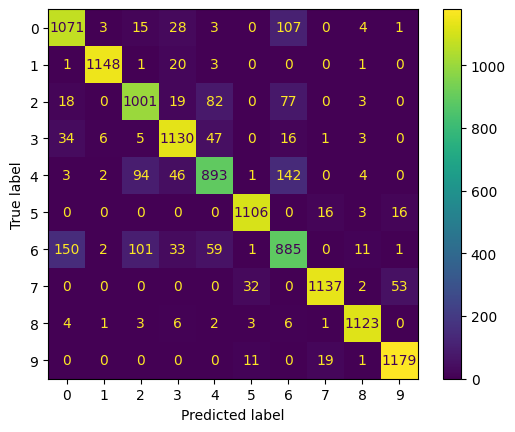

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred_val_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Accuracy, Precision, Recall, F1-score

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_val_class))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1232
           1       0.99      0.98      0.98      1174
           2       0.82      0.83      0.83      1200
           3       0.88      0.91      0.90      1242
           4       0.82      0.75      0.79      1185
           5       0.96      0.97      0.96      1141
           6       0.72      0.71      0.71      1243
           7       0.97      0.93      0.95      1224
           8       0.97      0.98      0.97      1149
           9       0.94      0.97      0.96      1210

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



- When evaluated using the validation set, the model demonstrates an accuracy of 0.89, indicating overall good performance.
- Most classes exhibit a precision around or above 0.9, with classes 2, 4, and 6 showing approximately 0.7 to 0.8.
- Class 6 notably has a lower precision and recall, 0.72 and 0.71 respectively.
- Considering both precision and recall, the f1-score reveals class 6 to have the lowest score at 0.71.

## 5. Run the model on the test set, and provide clear and relevant conclusions

### Predict values using test data set

In [177]:
y_pred_test = best_model.predict(X_test)
y_pred_test.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

### Assign the class witht the highest probability

In [178]:
y_pred_test_class = y_pred_test.argmax(axis=1)
y_pred_test_class

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

### Confusion Matrix

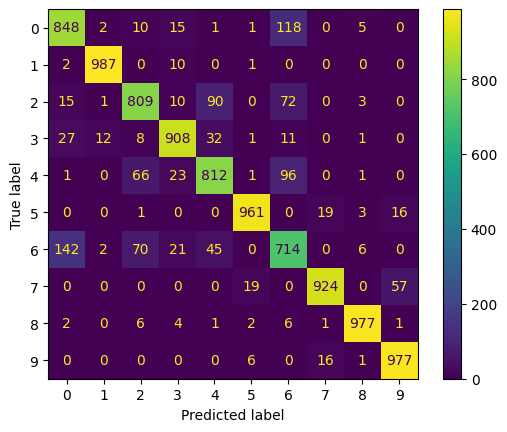

In [179]:
cm = confusion_matrix(y_test, y_pred_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Accuracy, Precision, Recall, F1-score

In [180]:
print(classification_report(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.98      0.99      0.99      1000
           2       0.83      0.81      0.82      1000
           3       0.92      0.91      0.91      1000
           4       0.83      0.81      0.82      1000
           5       0.97      0.96      0.96      1000
           6       0.70      0.71      0.71      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Conclusion

1. Accuracy
- This model has an accuracy of 0.89, which means that out of the 10,000 pieces of data in the test set, about 8,900 were successfully classified.

2. Precision
- Most classes exhibit a precision above 0.9, demonstrating good performance.
- In the case of class 6, the precision drops significantly to 0.70 compared to other classes.

3. Recall
- Regarding recall, class 6 has the lowest value of 0.71
- Referencing the confusion matrix, this is largely due to data originally belonging to class 6 being frequently predicted as class 0, 2, or 4

4. Cause Analysis
- Upon reviewing images of class 0, 2, 4 and class 6, it's observed that class 0 represents t-shirts, while class 6 represents shirts. 
- The occurrence of short-sleeved shirts in class 6 likely contributes to this confusion
- It can be observed that the images of classes 2, 4, and 6 look very similar, which may lead to lower classification performance for these classes.

## 6. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

### Precision-recall curve for class 5

In [181]:
from sklearn.metrics import precision_recall_curve

y_scores = y_pred_test
y_scores_5 = y_scores[:, 5]
y_test_5 = (y_test == 5).astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores_5)

print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])

[0.1        0.10001    0.10002    0.10003001 0.10004002]
[1. 1. 1. 1. 1.]
[3.8740736e-20 1.1920793e-19 1.4779576e-19 3.0944573e-19 1.0991552e-18]


In [188]:
# find the threshold for 97% precision
idx = (precisions >= 0.97).argmax()
thresholds[idx]

0.5053034

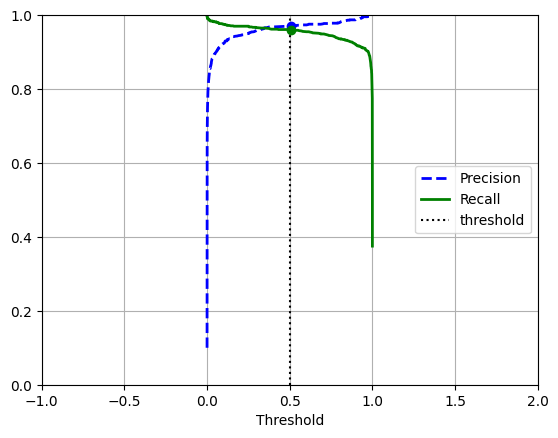

In [185]:
threshold = 0.50
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-1, 2, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

- As observed in the precision-recall graph, increasing the threshold results in higher precision but lower recall, whereas decreasing the threshold has the opposite effect.

### Increase precision for class 5

In [186]:
from sklearn.metrics import precision_score, recall_score

idx_for_99_precision = (precisions >= 0.99).argmax()
threshold_for_99_precision = thresholds[idx_for_99_precision]
print('threshold for 99% precision: ', threshold_for_99_precision)

y_test_pred_99 = (y_scores_5 >= threshold_for_99_precision)
print('precision score: ', precision_score(y_test_5, y_test_pred_99))
print('recall score: ', recall_score(y_test_5, y_test_pred_99))

threshold for 99% precision:  0.9192923
precision score:  0.9902702702702703
recall score:  0.916


- Originally, the precision for class 5 in the model was 0.97.
- To increase the precision to 0.99, the threshold was raised, resulting in precision increasing to 0.99 and recall decreasing from 0.96 to 0.92.

### 7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

### Increase recall for class 5

In [190]:
from sklearn.metrics import precision_score, recall_score

idx_for_98_recall = (recalls >= 0.98).argmin() - 1
threshold_for_98_recall = thresholds[idx_for_98_recall]
print('threshold for 98% recall: ', threshold_for_98_recall)

y_test_pred_98 = (y_scores_5 >= threshold_for_98_recall)
print('precision score: ', precision_score(y_test_5, y_test_pred_98))
print('recall score: ', recall_score(y_test_5, y_test_pred_98))

threshold for 98% recall:  0.06795582
precision score:  0.9099350046425255
recall score:  0.98


- Originally, the recall for class 5 was 0.96.
- In an effort to increase recall, the threshold was lowered, which resulted in an increase in recall to 0.98 and a decrease in precision from 0.97 to 0.91.